In [1]:
import vaex
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
hdugiants = fits.open('/Users/landerson/Downloads/2686.fits')
giants = Table(hdugiants[1].data)

In [3]:
ds = vaex.from_astropy_table(giants)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
ds['pm'] = np.sqrt(ds.pmra**2 + ds.pmdec**2)
ds['shmag'] = ds.parallax*10**(0.2*ds.phot_g_mean_mag)

In [5]:
vaex.stat.sum(ds.b == 0)

sum((b == 0))

In [6]:
#vaex.stat.count(ds.bp_rp, selection=[ds.parallax == 0])

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


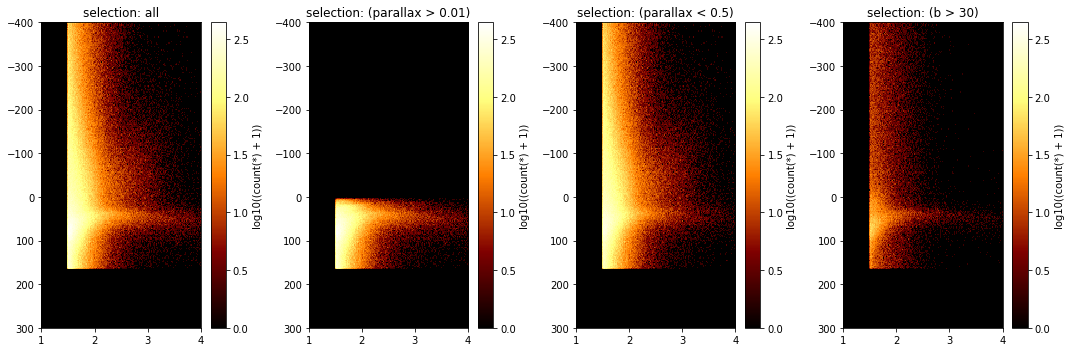

In [7]:
ds.plot(ds.bp_rp, ds.parallax*10**(0.2*ds.phot_g_mean_mag), 
        what=np.log10(vaex.stat.count() + 1), limits=[[1, 4],[300, -400]], 
        selection=[None, ds.parallax > 0.01, ds.parallax < 0.5, ds.b>30], 
        visual=dict(column='selection'), figsize=(15,5)) # , what=vaex.stat.mean(ds.phot_g_mean_mag))

In [8]:
len(ds)

1692995

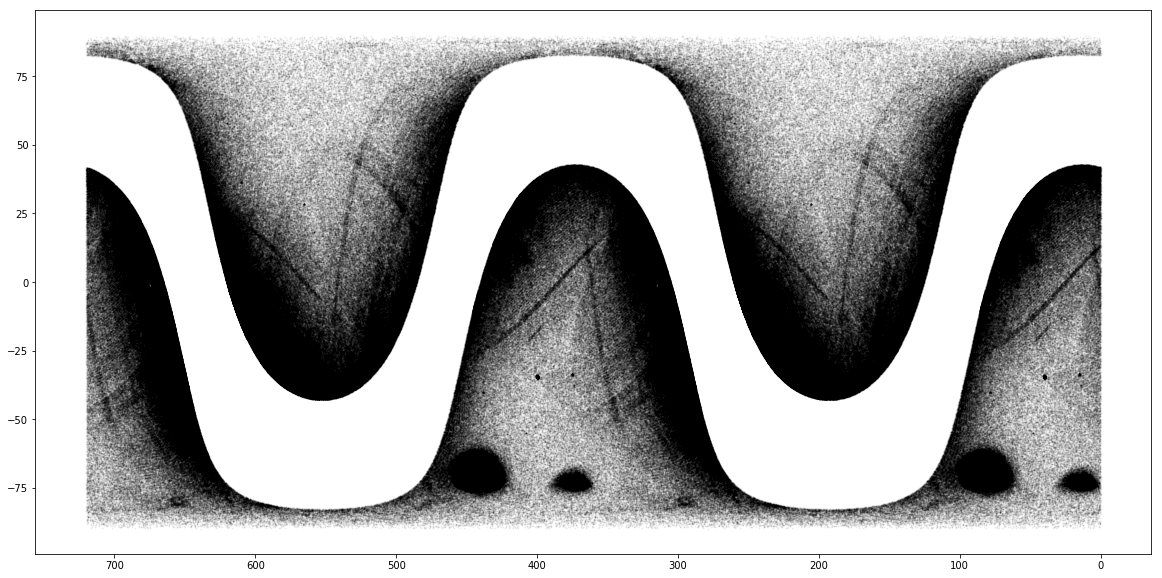

In [9]:
I = ds.bp_rp > 1.2
plt.figure(figsize=(20, 10))
plt.scatter(ds[I].ra.values,ds[I].dec.values, s=1, alpha=0.05, c='black' )
plt.scatter(ds[I].ra.values + 360.,ds[I].dec.values, s=1, alpha=0.05, c='black' )
plt.gca().invert_xaxis()

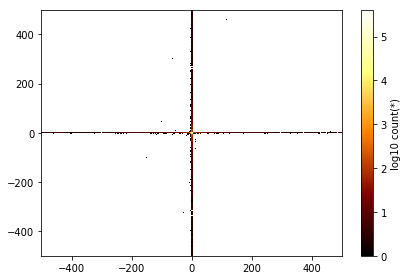

In [10]:
ds.plot(ds.ra, ds.dec, f='log10', limits=[[-500, 500],[-500, 500]]) #, selection=[(ds.bp_rp > 1.0) & (ds.shmag < 250)]) #, what=vaex.stat.count())

In [11]:
ds.b.fillna

<bound method fillna of <vaex.expression.Expression(expressions='b')> instance at 0x169bab278 values=[-32.620829568809675, 23.6691793210862, -35.66311870576502, 37.65192541014795, 29.758080971660966 ... (total 1692995 values) ... 21.34605219107714, 20.26871540819154, -25.610343444674314, -44.19988858299037, 24.843631445923776] >

Sigma is 30.000000 arcmin (0.008727 rad) 
-> fwhm is 70.644601 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


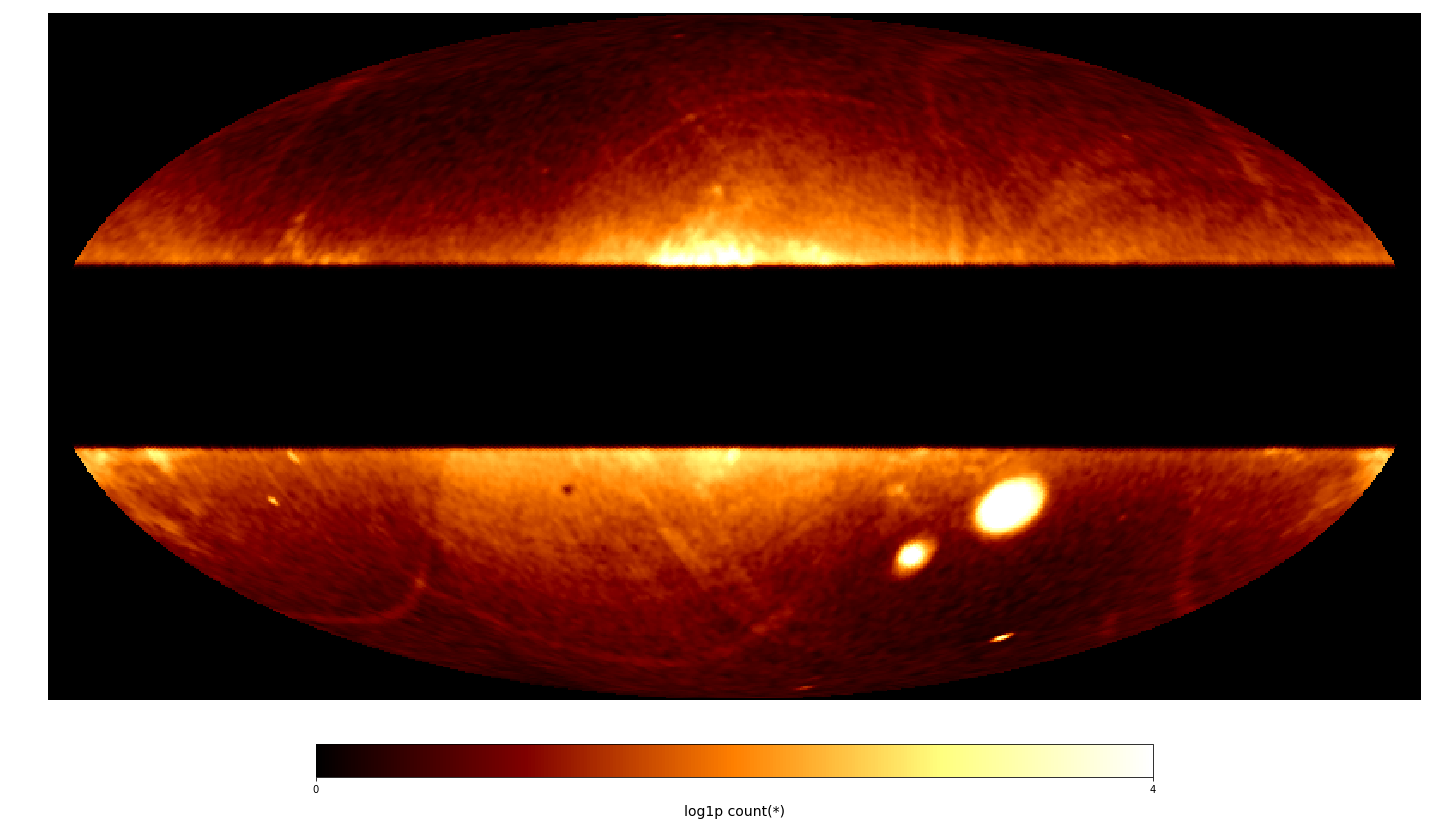

In [12]:
ds.healpix_plot(figsize=(30,15), smooth=0.5, f="log1p", grid_limits=[0, 4], rotation=(0,0,0))# , selection=[ds.b>20])

In [13]:
ds.plot?